In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

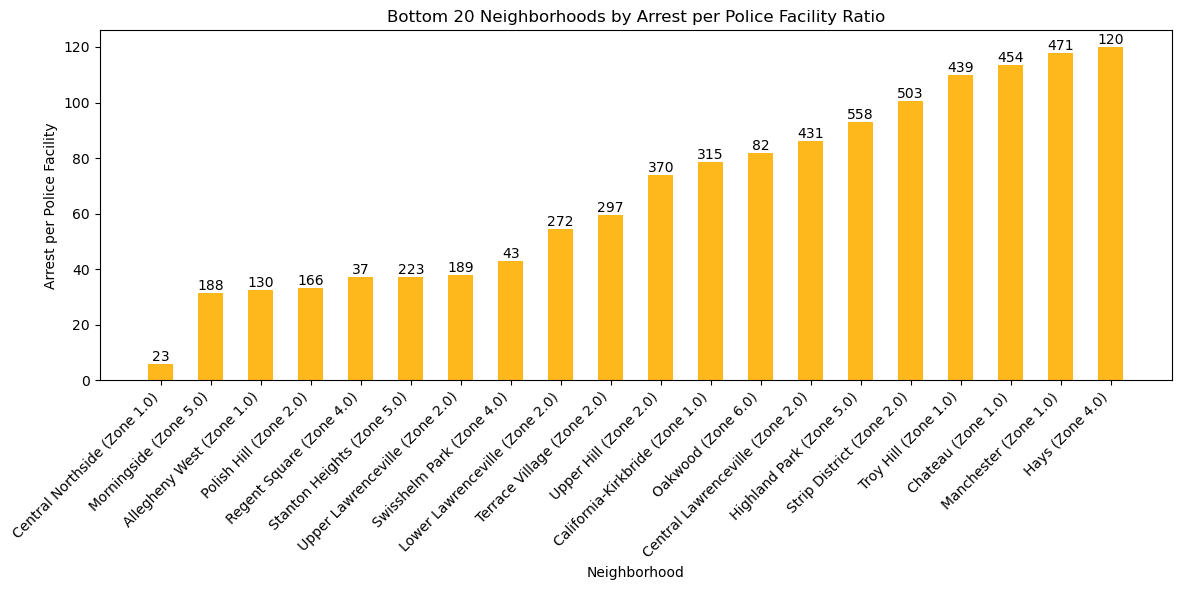

In [19]:
facilities_df = pd.read_csv("City Facilities.csv")
mapping_df = facilities_df[['neighborhood', 'police_zone']].dropna().drop_duplicates(subset=['neighborhood'])

mapping_df['neighborhood'] = mapping_df['neighborhood'].astype(str).str.strip().str.lower()
mapping_df['police_zone'] = mapping_df['police_zone'].astype(str).str.strip().str.lower()

neighborhood_to_zone = mapping_df.set_index('neighborhood')['police_zone'].to_dict()

police_facilities = facilities_df[facilities_df["name"].str.contains("police", case=False, na=False)].copy()
police_facilities['police_zone'] = police_facilities['police_zone'].astype(str).str.strip().str.lower()

police_station_counts = police_facilities["police_zone"].value_counts().reset_index()
police_station_counts.columns = ["police_zone", "police_station_count"]

arrest_df = pd.read_csv("Police Arrest Data.csv")
arrest_df['INCIDENTNEIGHBORHOOD'] = arrest_df['INCIDENTNEIGHBORHOOD'].astype(str).str.strip().str.lower()

arrest_by_neighborhood = arrest_df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_by_neighborhood.columns = ["neighborhood", "arrest_count"]

arrest_by_neighborhood['police_zone'] = arrest_by_neighborhood['neighborhood'].map(neighborhood_to_zone)
arrest_by_neighborhood = arrest_by_neighborhood.dropna(subset=['police_zone'])
arrest_by_neighborhood['police_zone'] = arrest_by_neighborhood['police_zone'].astype(str).str.strip().str.lower()

merged_neighborhood = pd.merge(arrest_by_neighborhood, police_station_counts,
                               left_on='police_zone', right_on='police_zone', how='inner')

merged_neighborhood['arrest_per_station'] = merged_neighborhood['arrest_count'] / merged_neighborhood['police_station_count']

bottom20 = merged_neighborhood.sort_values("arrest_per_station", ascending=True).head(20)
x = np.arange(len(bottom20))
bar_width = 0.5

plt.figure(figsize=(12, 6))
bars = plt.bar(x, bottom20["arrest_per_station"], width=bar_width, color='#FFB81C')

plt.xlabel("Neighborhood")
plt.ylabel("Arrest per Police Facility")
plt.title("Bottom 20 Neighborhoods by Arrest per Police Facility Ratio")

labels = [f"{row['neighborhood'].title()} (Zone {row['police_zone'].upper()})" for _, row in bottom20.iterrows()]
plt.xticks(x, labels, rotation=45, ha="right")

for i, bar in enumerate(bars):
    height = bar.get_height()
    abs_arrest = int(bottom20["arrest_count"].iloc[i])
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{abs_arrest}", ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

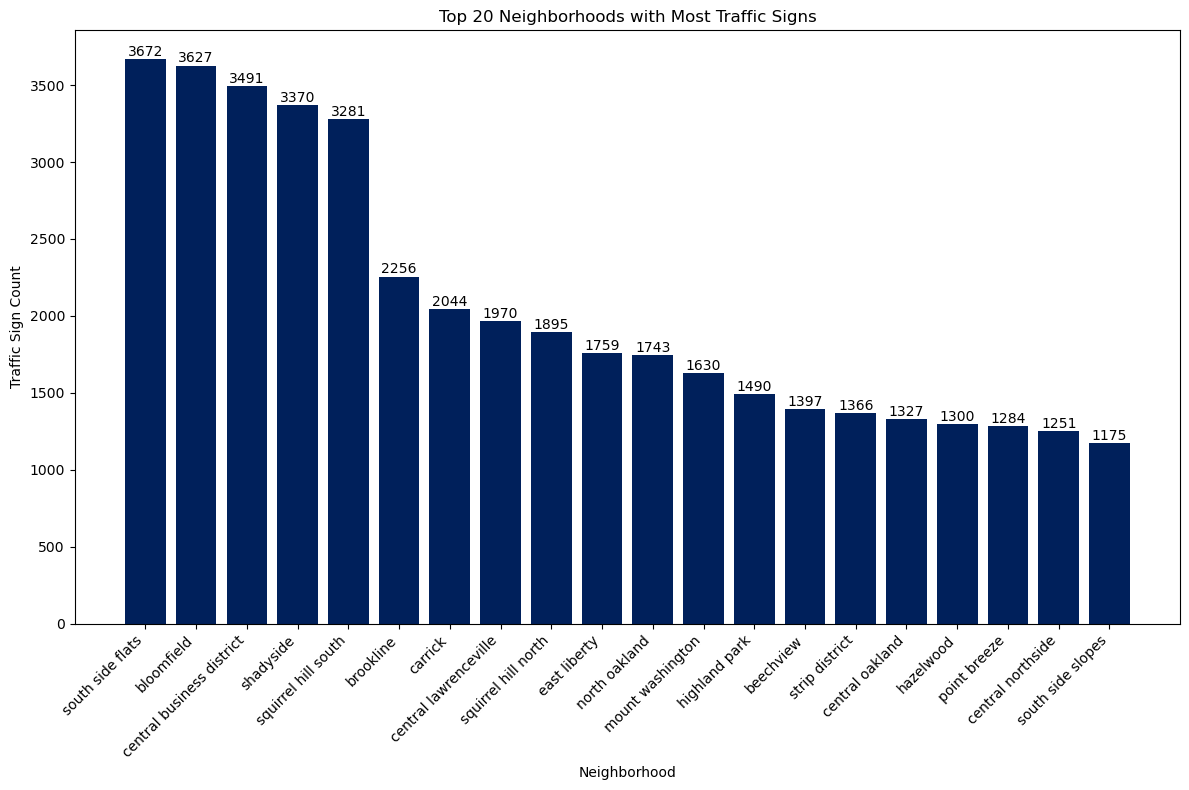

In [15]:
traffic_df = pd.read_csv("City Traffic Signs.csv")

traffic_df['neighborhood'] = traffic_df['neighborhood'].astype(str).str.strip().str.lower()

traffic_counts = traffic_df['neighborhood'].value_counts().sort_values(ascending=False).reset_index()
traffic_counts.columns = ['neighborhood', 'traffic_sign_count']

top20 = traffic_counts.head(20)
plt.figure(figsize=(12, 8))
bars = plt.bar(top20['neighborhood'], top20['traffic_sign_count'], color='#00205B')
plt.xlabel("Neighborhood")
plt.ylabel("Traffic Sign Count")
plt.title("Top 20 Neighborhoods with Most Traffic Signs")
plt.xticks(rotation=45, ha='right')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             str(height), ha='center', va='bottom')
plt.tight_layout()
plt.show()

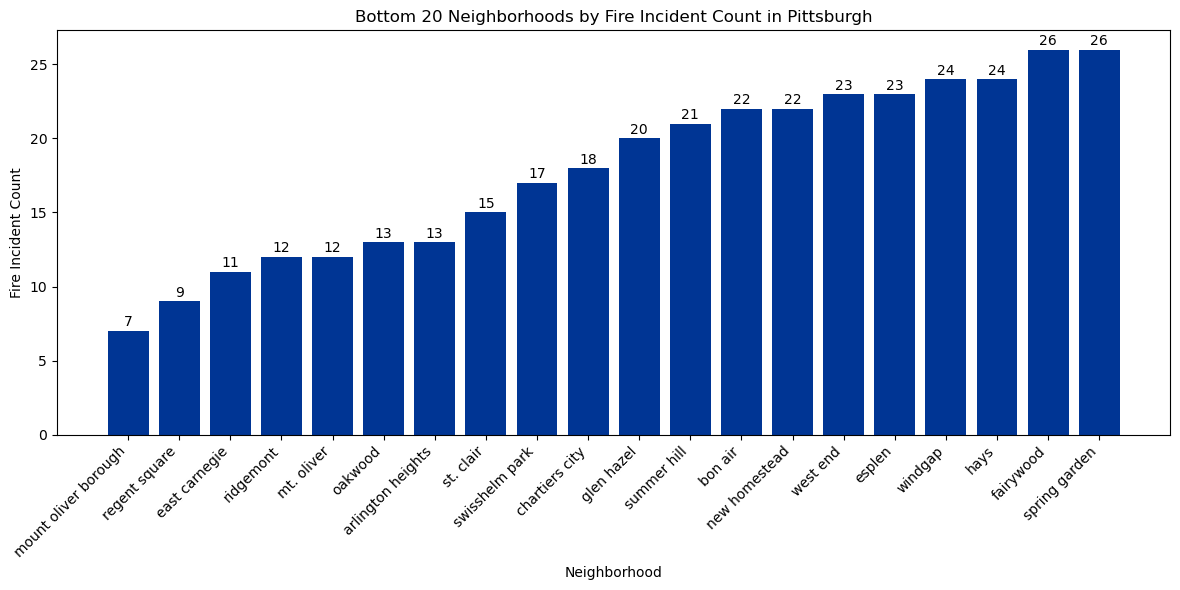

In [20]:
fire_df = pd.read_csv("Fire Incidents.csv")

fire_df['neighborhood'] = fire_df['neighborhood'].astype(str).str.strip().str.lower()

fire_counts = fire_df['neighborhood'].value_counts().sort_values(ascending=False).reset_index()
fire_counts.columns = ['neighborhood', 'fire_count']

bottom20 = fire_counts.tail(20).sort_values(by='fire_count', ascending=True)

plt.figure(figsize=(12, 6))
bars = plt.bar(bottom20['neighborhood'], bottom20['fire_count'], color='#003594')

plt.title("Bottom 20 Neighborhoods by Fire Incident Count in Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Fire Incident Count")
plt.xticks(rotation=45, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             str(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [48]:
traffic_neighborhoods = set(traffic_counts.head(20)['neighborhood'])
police_neighborhoods = set(merged_neighborhood.sort_values("arrest_per_station", ascending=True).head(20)['neighborhood'])
fire_neighborhoods = set(fire_counts.tail(20).sort_values(by='fire_count', ascending=True)['neighborhood'])

common_neighborhoods = fire_neighborhoods.intersection(police_neighborhoods, traffic_neighborhoods)

if not common_neighborhoods:
    print("There are no common neighborhoods among the three datasets.")
else:
    print("Common neighborhoods among the three datasets:")
    for n in sorted(common_neighborhoods):
        print(n)

print()

common_police_traffic = police_neighborhoods.intersection(traffic_neighborhoods)
common_police_fire = police_neighborhoods.intersection(fire_neighborhoods)

if not common_police_traffic:
    print("There are no common neighborhoods between police data and traffic sign data.")
else:
    print("Common neighborhoods between police data and traffic sign data:")
    for n in sorted(common_police_traffic):
        print(n)

print()

if not common_police_fire:
    print("There are no common neighborhoods between police data and fire incident data.")
else:
    print("Common neighborhoods between police data and fire incident data:")
    for n in sorted(common_police_fire):
        print(n)


There are no common neighborhoods among the three datasets.

Common neighborhoods between police data and traffic sign data:
central lawrenceville
central northside
highland park
strip district

Common neighborhoods between police data and fire incident data:
hays
oakwood
regent square
swisshelm park


**There's no common neighborhoods among the three datasets**

So, we will use common neighborhoods between police data and traffic sign data, and common neighborhoods between police data and fire incident data

Missing neighborhoods from merged_neighborhood data: []

Selected data for the specified neighborhoods:
             neighborhood  arrest_per_station  arrest_count
35      central northside                5.75            23
63          regent square               37.00            37
62         swisshelm park               43.00            43
74                oakwood               82.00            82
6   central lawrenceville               86.20           431
45          highland park               93.00           558
5          strip district              100.60           503
61                   hays              120.00           120


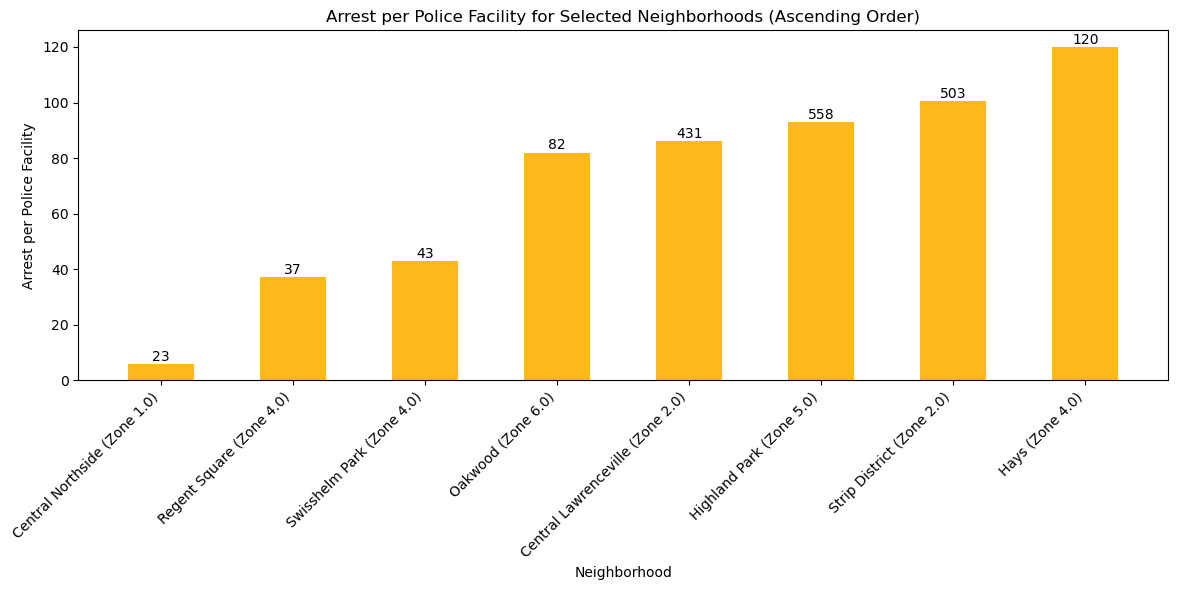

In [57]:
facilities_df = pd.read_csv("City Facilities.csv")

mapping_df = facilities_df[['neighborhood', 'police_zone']].dropna().drop_duplicates(subset=['neighborhood'])
mapping_df['neighborhood'] = mapping_df['neighborhood'].astype(str).str.strip().str.lower()
mapping_df['police_zone'] = mapping_df['police_zone'].astype(str).str.strip().str.lower()
neighborhood_to_zone = mapping_df.set_index('neighborhood')['police_zone'].to_dict()

police_facilities = facilities_df[facilities_df["name"].str.contains("police", case=False, na=False)].copy()
police_facilities['police_zone'] = police_facilities['police_zone'].astype(str).str.strip().str.lower()
police_station_counts = police_facilities["police_zone"].value_counts().reset_index()
police_station_counts.columns = ["police_zone", "police_station_count"]

arrest_df = pd.read_csv("Police Arrest Data.csv")
arrest_df['INCIDENTNEIGHBORHOOD'] = arrest_df['INCIDENTNEIGHBORHOOD'].astype(str).str.strip().str.lower()
arrest_by_neighborhood = arrest_df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_by_neighborhood.columns = ["neighborhood", "arrest_count"]

arrest_by_neighborhood['police_zone'] = arrest_by_neighborhood['neighborhood'].map(neighborhood_to_zone)
arrest_by_neighborhood = arrest_by_neighborhood.dropna(subset=['police_zone'])
arrest_by_neighborhood['police_zone'] = arrest_by_neighborhood['police_zone'].astype(str).str.strip().str.lower()

merged_neighborhood = pd.merge(arrest_by_neighborhood, police_station_counts,
                               left_on='police_zone', right_on='police_zone', how='inner')

merged_neighborhood['arrest_per_station'] = merged_neighborhood['arrest_count'] / merged_neighborhood['police_station_count']

selected_neighborhoods = [
    "central lawrenceville", 
    "central northside", 
    "highland park", 
    "strip district", 
    "hays", 
    "oakwood", 
    "regent square", 
    "swisshelm park"
]

available_neighborhoods = set(merged_neighborhood["neighborhood"].unique())
missing = [nb for nb in selected_neighborhoods if nb not in available_neighborhoods]
print("Missing neighborhoods from merged_neighborhood data:", missing)

selected_df = merged_neighborhood[merged_neighborhood["neighborhood"].isin(selected_neighborhoods)].copy()

selected_df = selected_df.sort_values(by="arrest_per_station", ascending=True)

# Debug: Print the filtered DataFrame to verify
print("\nSelected data for the specified neighborhoods:")
print(selected_df[['neighborhood', 'arrest_per_station', 'arrest_count']])

x = np.arange(len(selected_df))
bar_width = 0.5

plt.figure(figsize=(12, 6))
bars = plt.bar(x, selected_df["arrest_per_station"], width=bar_width, color='#FFB81C')

plt.xlabel("Neighborhood")
plt.ylabel("Arrest per Police Facility")
plt.title("Arrest per Police Facility for Selected Neighborhoods (Ascending Order)")

labels = [f"{row['neighborhood'].title()} (Zone {row['police_zone'].upper()})" 
          for _, row in selected_df.iterrows()]
plt.xticks(x, labels, rotation=45, ha="right")

for i, bar in enumerate(bars):
    height = bar.get_height()
    abs_arrest = int(selected_df["arrest_count"].iloc[i])
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02,
             f"{abs_arrest}", ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()
